<a href="https://colab.research.google.com/github/Ashish-17CSE/Deep_Learning/blob/master/DL_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [2]:
#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#reshape
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


11493376/11490434 [==============================] - 0s 0us/step


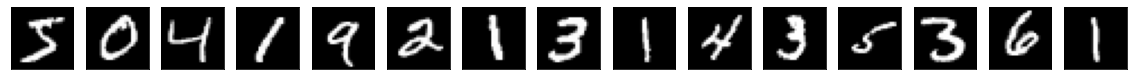

In [5]:
n = 15  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

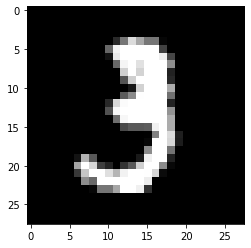

In [6]:
xx_train = x_train.astype('float32') / 255.
xx_test = x_test.astype('float32') / 255.
plt.imshow(x_train[10].reshape(28,28))
plt.show()

In [7]:
XX_train = xx_train.T
XX_test = xx_test.T

n_classes = 10 #number of classes
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [8]:
def initialize_param(d):
  w = np.zeros((d,10))
  print("Shape of w", w.shape)
  b = np.zeros((10,1))
  params = {"w": w,"b": b}
  return params

In [9]:
def softmax(Z):
    Z1 = np.exp(Z).T
    sum = np.sum(np.exp(Z), axis=1)
    A = Z1/sum
    A = A.T
    return A

In [10]:
def forward(params,X,Y):
  w = params["w"]
  b = params["b"]
  m = X.shape[1]
  A = softmax((np.dot(w.T,X) + b).T)
  cost = (-1/m)*np.sum(Y*np.log(A))
  return A,cost

In [11]:
def backprop(X,Y,A):
  m = X.shape[1]
  dw = (1 / m) * np.dot(X,(A-Y))
  db = (1 / m) * np.sum(A - Y)
  return dw, db

In [12]:
def optimize(params, X, Y, num_iterations, l_rate):
  w = params["w"]
  b = params["b"]
  costs = []
  for i in range(num_iterations):
    A,cost = forward(params,X,Y)
    dw,db = backprop(X,Y,A)
    params["w"] = params["w"] - l_rate * dw 
    params["b"] = params["b"] - l_rate * db
    if (i%1000==0):
      print("Cost on {} iteration: {} with dw : {} and db : {}".format(i,cost,np.linalg.norm(dw),db))
    costs.append(cost)
  return params,costs

In [13]:
def predict(params,X):
  w = params["w"]
  b = params["b"]
  m = X.shape[1]
  A = softmax((np.dot(w.T, X) + b).T)
  return A

In [14]:
def model(d, X_train, Y_train, X_test, Y_test, num_iter, l_rate):
    print("X_train shape : " , X_train.shape)
    params , costs = 0,0
    params = initialize_param(d)
    print(params["w"].shape,"pshape")
    params,costs = optimize(params, X_train, Y_train, num_iter, l_rate)
    Y_hat_train = predict(params,X_train)
    Y_hat_test = predict(params,X_test)
  
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_test - Y_test)) * 100))
    return params,costs

In [18]:
params,costs = model(784, XX_train, Y_train, XX_test, Y_test, 1000, 0.01)

X_train shape :  (784, 60000)
Shape of w (784, 10)
(784, 10) pshape
Cost on 0 iteration: 2.302585092994045 with dw : 1.0407935240080728 and db : 4.309330670082545e-17
Cost on 1000 iteration: 0.6804517908251323 with dw : 0.18636285700803068 and db : 3.885780586188048e-20
train accuracy: 93.58136977424448 %
test accuracy: 93.78191542753284 %
X_train shape :  (784, 60000)
Shape of w (784, 10)
(784, 10) pshape
Cost on 0 iteration: 2.302585092994045 with dw : 1.0407935240080728 and db : 4.309330670082545e-17
train accuracy: 92.59138145809246 %
test accuracy: 92.79278987843296 %


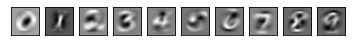

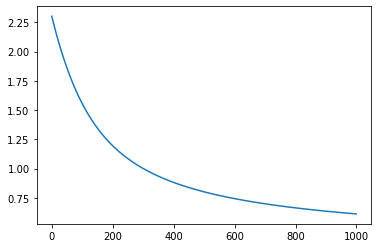

In [19]:
for i in range(10):
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(params['w'][:,i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.plot(range(len(costs)),costs)

In [20]:
print("Training Accuracy: {} %".format(100 - np.mean(np.abs(predict(params,XX_train) - Y_train)) * 100))
print("Testing Accuracy: {} %".format(100 - np.mean(np.abs(predict(params,XX_test) - Y_test)) * 100))

Training Accuracy: 92.59138145809246 %
Testing Accuracy: 92.79278987843296 %
